In [70]:
from allthethings import PyNetwork, PyPipe_ps
from allthethings import PyBC_opt_dh
import numpy as np
import matplotlib.pyplot as plt
from writeit import rewritePipes
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [71]:
case =3; #case =1,2, or 3. Corresponds to test cases (I), (II), and (III) from paper
Ds = [1.]*3
jt = [1,3,1,1]
bt = [1,1,1,1]
bv = [0,0,0,0]
r = [0,0,1,1]
ndof = 15


#case (I)
if case==1:
    Ls = [100,100,25]
    Ns = [100,100,25]
    T = 60
    M = 7500
    a = 100
    h0s = [0,0,0]
    q0s = [0,0,0]
    Mrs = [0.015]*3
    md = 0
    Q00 = 2.5*np.ones(M+1)
    Vin = dt*sum(Q00)
    x0 = np.zeros(ndof)
    for i in range((ndof-1)/2-1):
        x0[2*i+1]= Vin/T
#Case(II) and (III) differ only in a
if case >1:
    Ls = [100,100,50]
    Ns = [200,200,100]
    Mrs = [0.008]*3
    
   
    x0 = np.array([0.,0.,0.,0., 0.,0.,0.,0.,1.591549430918954,0.,0.530516476972984,0.,0.318309886183791,0.,0.227364204416993])
    if case==2:#Case(II)
        a = 10
        T = 120
        M = 4000
        Q00 = np.zeros(M+1)
        for i in range(M+1/2):
            Q00[i] = Vin/T
        h0s = [10,0,0]
        q0s = [5,0,0]
        md = 1
    elif case ==3:#Case(III)
        a =100
        T = 16
        M = 4000
        Vin = 20
        Q00 = np.zeros(M+1)
        for i in range(M+1/2):
            Q00[i] = Vin/T
        h0s = [10,0,0]
        q0s = [2.5,0,0]
        md = 1
        
fn = "indata/dhoptimization"
oldinp = "indata/better3pipes.inp"
(fi, fc) = rewritePipes(fn,oldinp, Ns, Ls, Mrs, Ds, jt, bt, bv, r, h0s, q0s, T, M, a)


new files are indata/dhoptimization.inp and indata/dhoptimization.config


In [72]:
mtype =1
#pressure wave speed a = 10
#fi = "indata/better3pipes.inp"
#fc =  "indata/better3pipes2.config"
#pressure wave speed a = 120
#fi = "indata/better3pipes.inp"
#fc =  "indata/better3pipes.config"
#try something else
#fi = "indata/3pipesL1.inp"
#fc = "indata/3pipesL1.config"
n0 = PyNetwork(fi, fc, mtype)
M = n0.M


#for i in range(0,M/2):
#for i in range(M/2,M+1):   
#    Q00[i] = 1

In [21]:
#x0 = 0.1*np.random.rand(n0.M+1)
dt = n0.T/n0.M
#V0 = n0.getTotalVolume()
#n0.setbVal(2,x0)
n0.setbVal(0,Q00)
n0.runForwardProblem(dt)  #solve up to time T
Vf = n0.getTotalVolume()


[5.2791565342266775, 6.340701209784081, 14.480964666304983]
0.008
0.004


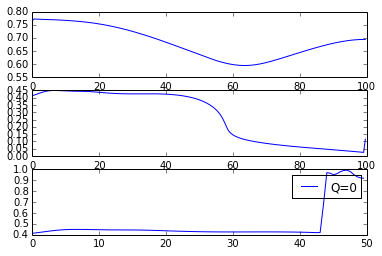

In [13]:
hi = [n0.getHofA(i) for i in range(3)]
fig,ax = plt.subplots(nrows = n0.Nedges)
x0 = [0,0,0]
for k in range(n0.Nedges):
    x = np.arange(0,n0.Ls[k], n0.Ls[k]/n0.Ns[k])+x0[k]*np.ones(size(hi[k]))
    ax[k].plot(x,hi[k],'b')
legend(['Q=0', 'reflect'])
print n0.cmax
print dt/(n0.Ls[0]/n0.Ns[0])
print dt
dx = n0.Ls[0]/n0.Ns[0]

CFL = 0.800000 
space-average grad(H)
        Q = 0       reflecting
max  5.511821  
mean 17.241731  
[5.2791565342266775, 6.340701209784081, 14.480964666304983]
[100.0, 100.0, 100.0]


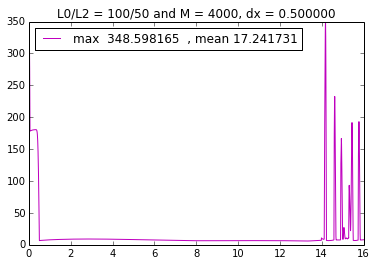

In [22]:
print "CFL = %f " %(dt/dx*n0.a[0])
Hbar = [n0.getAveGradH(i) for i in range(n0.M+1)]
t = np.linspace(0,n0.T,n0.M+1)
kk = 1
plot(t,Hbar,'m')
legend(["max  %f  , mean %f" %(max(Hbar),mean(Hbar))], loc ='upper left')
#savefig("../../gradH_r66.pdf", format='pdf')
title("L0/L2 = %.f/%.f and M = %d, dx = %f"%(n0.Ls[0],n0.Ls[2], n0.M, n0.Ls[0]/n0.Ns[0]))
print "space-average grad(H)"
print "        Q = 0       reflecting"
print "max  %f  " %(max(Hbar)/sqrt(n0.M))
print "mean %f  " %(mean(Hbar))
dx = n0.Ls[0]/n0.Ns[0]

print n0.cmax
print n0.a

In [23]:
def idx_t(i,j,n,N):
    return (2*(N+2)*n+(N+2)*i+j)

0.000769690200129


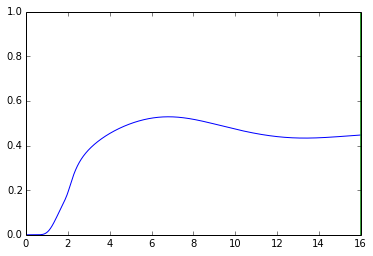

In [24]:
qh = [n0.qhist(i) for i in range(n0.Nedges)]
j = 20#n0.Ns[0]
K = 2
p1 = PyPipe_ps(n0.Ns[0], n0.Ds[K], n0.Ls[K], n0.M, n0.a[K])
qtest = [p1.HofA(qh[K][idx_t(0,j,n,n0.Ns[K])],False) for n in range(n0.M+1)]
plot(t,qtest)
Af = np.pi/4.
print (Af*9.8)/(n0.a[0]**2)
plot(t,Q00)

In [54]:

wn=0;
opt1 = PyBC_opt_dh(fi, fc, ndof, x0, wn, Vin, md)
Q0orig = opt1.getBCtimeseries()
opt1.compute_f()


15
15


-3.5527136788e-15
16.0
16.0
2.0
2.28571428571
24.0
2.0
[ 0.  2.  0.  2.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


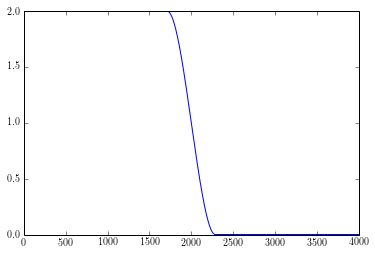

In [55]:
plot(Q0orig)
Vin2 = np.trapz(Q0orig, x=t)
print Vin2-Vin
print Vin
print Vin2
print Q0orig[0]
Dt = T/((ndof-1)/2.)
print Dt
print T/7.*17.5-Vin
print Q0orig[0]
print x0

In [56]:
f0 = opt1.f
print "f is %f" %f0
print "T is %f" %opt1.T
print "Using %s modes" %opt1.modetype



f is 37000.862461
T is 16.000000
Using Hermite modes


In [57]:
opt1.solve()

In [58]:
print opt1.f
#opt2 = PyBC_opt_dh(fi, fc, 15, np.array(xgood2), wn, Vin)
#opt2.compute_f()
#xgood = opt1.x

35755.9931665


In [59]:
ff = opt1.f
#print ff/f0
#print xgood
print opt1.x
#print 2*Vin/n0.T

[-0.15692721134962362, 1.7253326693902655, 0.08193426322179283, 1.6450867292533309, -0.00029040921357422313, 1.546101667567202, 0.12401148197062294, 0.2645628691590007, 0.017133806168854643, 0.25433945239068567, -0.038628429086280544, 0.04087659983109293, -0.010342067968712225, 0.028162264713840767, -0.013358332114330233]


In [60]:
#make a place to put the data
import os
lucky = 1e6  #you feeling lucky today pal? 1/lucky are your odds of overwriting old data
kk = np.int(lucky*np.random.rand())
where = "../results_ndof%d_wavespeed_%03.f_improvement_%f/"%(ndof,n0.a[0],ff/f0)
if not os.path.exists(where):
    os.makedirs(where)

[-0.15692721134962362, 1.7253326693902655, 0.08193426322179283, 1.6450867292533309, -0.00029040921357422313, 1.546101667567202, 0.12401148197062294, 0.2645628691590007, 0.017133806168854643, 0.25433945239068567, -0.038628429086280544, 0.04087659983109293, -0.010342067968712225, 0.028162264713840767, -0.013358332114330233]


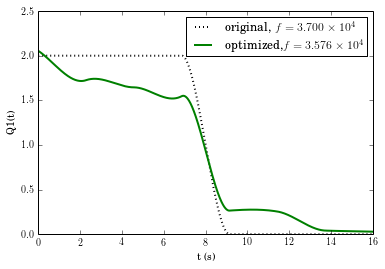

In [61]:
rc('text', usetex=True)
rc('font', family='serif')
ff = opt1.f
Q01 = opt1.getBCtimeseries()
#Q02 = opt2.getBCtimeseries()
t = np.linspace(0,opt1.T, opt1.M+1)
fig,ax = plt.subplots(nrows = 1)


ax.plot(t,Q0orig,'k:', linewidth = 2)#,t,np.zeros(opt1.M+1),'r')
ax.plot(t,Q01,'g', linewidth = 2)
ax.set_ylabel('Q1(t)')

#ax[0].plot(t,Q1,'b')#,t,np.zeros(opt1.M+1),'r')
#ax[0].plot(t,Q12,'g')
#ax[0].set_ylabel('Q1(t)')
#ax[1].plot(t,Q2,'b')#,t,np.zeros(opt1.M+1),'r')
#ax[1].plot(t,Q22, 'g')
s0 = "%.3e"%f0
sf = "%.3e"%ff
w0 = s0.find('e')
wf = sf.find('e')
p0 = int(s0[w0+2:])
pf = int(sf[wf+2:])
legend([r'original, $f = %s\times10^%1.d$'%(s0[0:w0],p0), r'optimized,$f = %s\times10^%1.d$'%(sf[0:wf],pf)], loc = 'upper right')
ax.set_xlabel('t (s)')
#ax[1].set_xlabel('t')
#ax[1].set_ylabel('Q2(t)')
savefig(where+"opt_dh_Qblahnod%d.eps"%ndof, format='eps')
#print max(abs(Q2[i]) for i in range(len(Q2)))
print opt1.x
#print opt2.x
#print "max discrepancy is %e"%max([Q1[i]-Q12[i] for i in range(len(Q1))])

In [62]:
n2 = PyNetwork(fi, fc, mtype)
n3 = PyNetwork(fi,fc, mtype)
n2.setbVal(0,Q0orig)
n3.setbVal(0,Q01)
n2.runForwardProblem(dt)
n3.runForwardProblem(dt)

In [63]:
xf = opt1.x
print xf

[-0.15692721134962362, 1.7253326693902655, 0.08193426322179283, 1.6450867292533309, -0.00029040921357422313, 1.546101667567202, 0.12401148197062294, 0.2645628691590007, 0.017133806168854643, 0.25433945239068567, -0.038628429086280544, 0.04087659983109293, -0.010342067968712225, 0.028162264713840767, -0.013358332114330233]


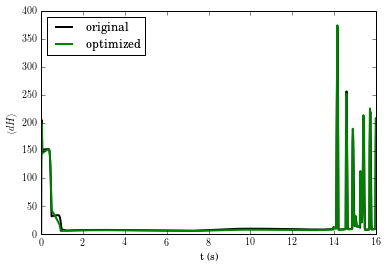

In [64]:
Hbar2 = [n2.getAveGradH(i) for i in range(n0.M+1)]
Hbar3 = [n3.getAveGradH(i) for i in range(n0.M+1)]
plot(t,Hbar2, 'k', t,Hbar3,'g', linewidth=2)
ax = gca()
legend(['original', 'optimized'], loc = 'upper left')
ax.set_xlabel('t (s)')
ax.set_ylabel(r"$\langle dH \rangle$")
savefig(where+"opt_dh_dhblahnodf%d.eps"%ndof, format='eps')

In [65]:
with open(where+"more_info.txt",'w') as fout:
    fout.write("data (Q0, Qf) pickled to Q0.p and Qf.p\n\n")
    fout.write("to generate whole history, load them and run:\n\
                n0 = PyNetwork(fi,fc, 1)\n\
                n0.setbVal(0,Q)\n\
                n0.runForwardProblem(dt)\n\
                for Q = Q00 or Q = Qf\n\n")
    fout.write("***************************************************************\n")
    fout.write( "CPU solve t  actual solve t    f0             ff            ff/f0      Vin\n")  
    fout.write( " %.2f         %.2f     %e     %e    %.5f   %.2f\n"%(opt1.solve_t, opt1.wsolve_t,f0, ff, ff/f0, Vin))
    fout.write("***************************************************************\n")
    fout.write("x0                   xf\n")
    for i in range(len(x0)):
        fout.write("%.15f    %.15f\n"%(x0[i],xf[i]))
import shutil
shutil.copy(fi,where)
shutil.copy(fc,where)


In [66]:
print "CPU solve t  actual solve t    ff/f0"  
print " %.2f         %.2f         %.5f"%(opt1.solve_t, opt1.wsolve_t,ff/f0)

CPU solve t  actual solve t    ff/f0
 3922.91         631.55         0.96636


In [67]:
import pickle
pickle.dump(Q00, open(where+"Q0.p", "wb"))
pickle.dump(Q01, open(where+"Qf.p", "wb"))

In [68]:
print where

../results_ndof15_wavespeed_100_improvement_0.966356/


In [69]:
Vin2 =  np.trapz(Q01,x=t)

print Vin2
print Vin
print np.trapz(Q00,x=t)

14.8351577612
16.0
15.998
